![logo](https://upload.wikimedia.org/wikipedia/commons/6/6a/Sbu-logo.svg)

# Assignment 3
## Mehrdad Baradaran (99222020)
## [Supermarket dataset for predictive marketing](https://www.kaggle.com/datasets/hunter0007/ecommerce-dataset-for-predictive-marketing-2023)


### The dataset consists of over 2 million purchase records at a renowned Hunter's supermarket :)


### Supermarket consumer behaviour dataset consists of 2019501 Rows & 12 Columns :

- order_id – (A unique number to identity the order)
- user_id - (A unique number to identify the user)
- order_number – (Number of the order)
- order_dow – (Day of the Week the order was made)
- order_hour_of_day – (Time of the order)
- days_since_prior_order - (History of the order)
- product_id – (Id of the product)
- add_to_cart_order – (Number of items added to cart)
- reordered – (If the reorder took place)
- department_id - (Unique number allocated to each department)
- department – (Names of the departments)
- product_name – (Name of the products)

![dataset](https://storage.googleapis.com/kaggle-datasets-images/2772962/4789874/84727b1ad7115193fb6e66c30080cb17/dataset-cover.jpg?t=2022-12-30-17-35-12)



# Outline
 - Explore and preprocess the dataset
    - handling categorical variables
    - normalizing or scaling numerical features
    - feature engineering
    
    
 - Use K-means clustering
    - Experiment with different values of K
    - use elbow method
    - use silhouette score


 - Visualize the clusters and analyze their characteristics
    - plotting the clusters in 2D or 3D
        - using PCA or t-SNE


 - Experiment other algorithms
    - DBSCAN
    - hierarchical clustering
    
    
 - compare other algorithms performance with K-means
 - reduce data dimensionality (PCA)
 - Interpret the results and provide insights to the store owners


<a id="2"></a>
<p style="background-color:#34495E;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;"> IMPORT LIBRARIES</p>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.options.mode.chained_assignment = None

In [2]:
!pip install seaborn

In [3]:
!pip install yellowbrick

In [4]:
!pip install phik

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import scale, StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
import phik 
from phik.report import plot_correlation_matrix
from phik import report

<a id="2"></a>
<p style="background-color:#2471A3;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;"> READ DATASETS</p>

In [6]:
#df=pd.read_csv('/kaggle/input/ecommerce-dataset-for-predictive-marketing-2023/ECommerce_consumer behaviour.csv')

In [7]:
df=pd.read_csv('ECommerce_consumer behaviour.csv')

<a id="2"></a>
<p style="background-color:#17A589
          ;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;"> EDA</p>

In [8]:
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables


In [9]:
df.tail()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
2019496,3390742,199430,16,3,18,5.0,83,8,0,4,produce,fresh vegetables
2019497,458285,128787,42,2,19,3.0,115,1,1,7,beverages,water seltzer sparkling water
2019498,458285,128787,42,2,19,3.0,32,2,1,4,produce,packaged produce
2019499,458285,128787,42,2,19,3.0,32,3,1,4,produce,packaged produce
2019500,458285,128787,42,2,19,3.0,123,4,1,4,produce,packaged vegetables fruits


In [10]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'department_id', 'department', 'product_name'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


In [12]:
df.isnull().sum()

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64

##### We have observed that the "days_since_prior_order" column contains null values, accounting for 6.8% of the total dataset.

In [13]:
df.nunique()

order_id                  200000
user_id                   105273
order_number                 100
order_dow                      7
order_hour_of_day             24
days_since_prior_order        31
product_id                   134
add_to_cart_order            137
reordered                      2
department_id                 21
department                    21
product_name                 134
dtype: int64

In [14]:
df_dspo = sorted(df['days_since_prior_order'].unique())
df_dspo

[nan,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0]

In [15]:
df.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id
count,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,1.895159e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06
mean,1.707013e+06,1.030673e+05,1.715138e+01,2.735367e+00,1.343948e+01,1.138603e+01,7.120590e+01,8.363173e+00,5.897427e-01,9.928349e+00
std,9.859832e+05,5.949117e+04,1.752576e+01,2.093882e+00,4.241008e+00,8.970980e+00,3.820727e+01,7.150059e+00,4.918804e-01,6.282933e+00
min,1.000000e+01,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,8.526490e+05,5.158400e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.100000e+01,3.000000e+00,0.000000e+00,4.000000e+00
50%,1.705004e+06,1.026900e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,8.300000e+01,6.000000e+00,1.000000e+00,9.000000e+00
75%,2.559031e+06,1.546000e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,1.070000e+02,1.100000e+01,1.000000e+00,1.600000e+01
max,3.421080e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01,1.340000e+02,1.370000e+02,1.000000e+00,2.100000e+01


### fill null values with -1 and convert data type
Since there is a value of 0 among the values of this feature, we fill the null values with -1.

In [16]:
df['days_since_prior_order'] = df['days_since_prior_order'].fillna(-1)
df['days_since_prior_order']= df['days_since_prior_order'].astype(np.int64)

In [17]:
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,-1,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,-1,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,-1,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,-1,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,-1,83,5,0,4,produce,fresh vegetables


### Distribution of the number of orders based on days of the week

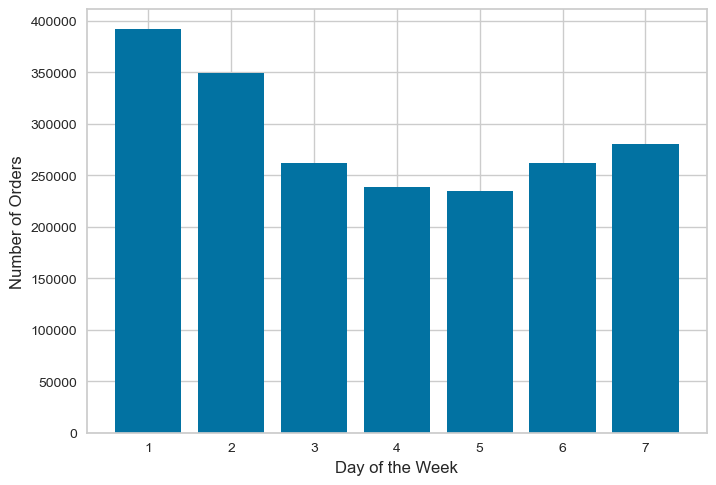

In [18]:
order_dow_counts = df.groupby('order_dow').size()

plt.bar(order_dow_counts.index + 1, order_dow_counts.values)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.show()

array([<Axes: ylabel='count'>], dtype=object)

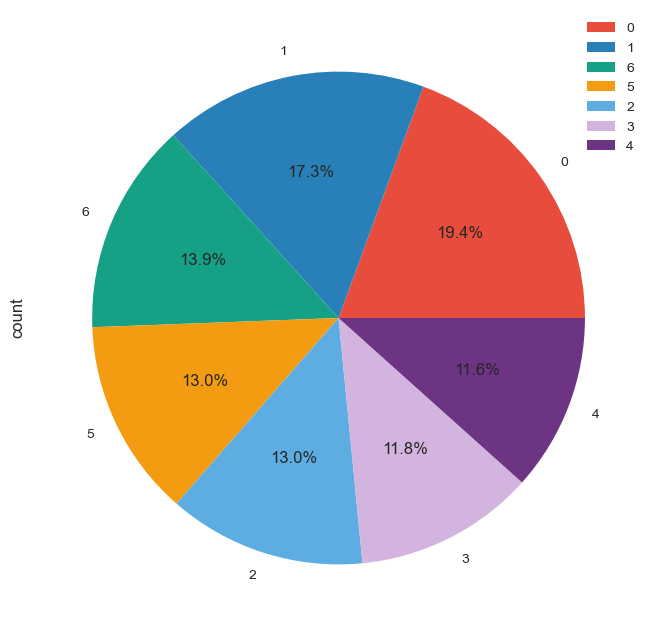

In [19]:
colors = ['#E74C3C', '#2980B9', '#16A085', '#F39C12', '#5DADE2', '#D2B4DE', '#6C3483']
df.groupby('order_dow')['user_id'].agg(['count']).sort_values(by='count', ascending=False).plot(kind='pie', autopct='%1.1f%%', colors = colors, subplots=True, figsize=(8,8))

### What time of the day has the most orders?

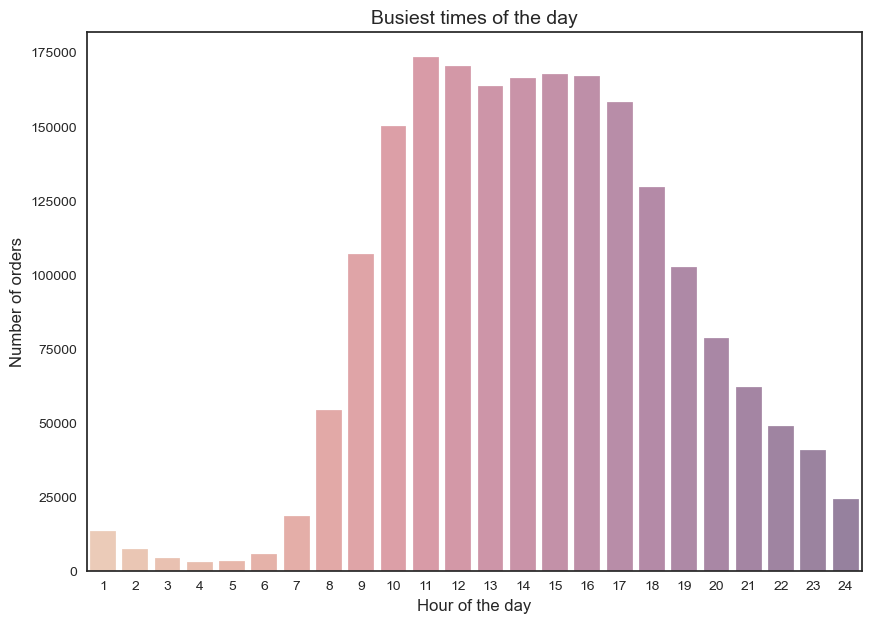

In [20]:
df['order_hour_of_day'].value_counts()

plt.figure(figsize = (10,7))
sns.set_style("ticks")
sns.countplot(data=df, x=df['order_hour_of_day'] + 1, palette = 'flare', alpha=0.6)
plt.title("Busiest times of the day", fontsize=14)
plt.xlabel("Hour of the day", fontsize=12)
plt.ylabel("Number of orders", fontsize=12)
plt.show()

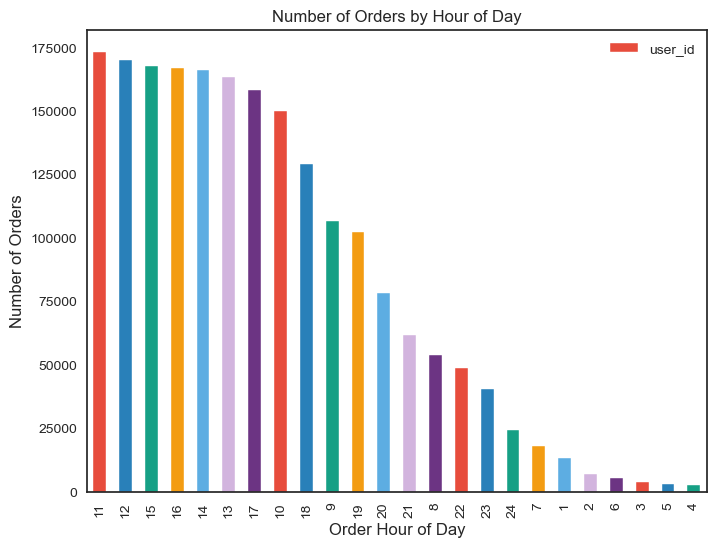

In [21]:
colors = ['#E74C3C', '#2980B9', '#16A085', '#F39C12', '#5DADE2', '#D2B4DE', '#6C3483']
grouped_df = df.groupby('order_hour_of_day', as_index=False).agg({'user_id':'count'}).sort_values(by='user_id',ascending=False)

grouped_df.plot(kind='bar', x='order_hour_of_day', y='user_id', color=colors, figsize=(8, 6))

plt.xlabel('Order Hour of Day')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Hour of Day')

plt.xticks(range(len(grouped_df)), grouped_df['order_hour_of_day'] + 1)

plt.show()

### Most departments that include orders

In [22]:
department_counts = df.groupby('department').size()
departments = df['department'].value_counts()
departments_df = pd.DataFrame(departments).reset_index()
departments_df.columns = ['Department', 'Order Count']
pop_departments = departments_df.sort_values(by='Order Count', ascending=False)

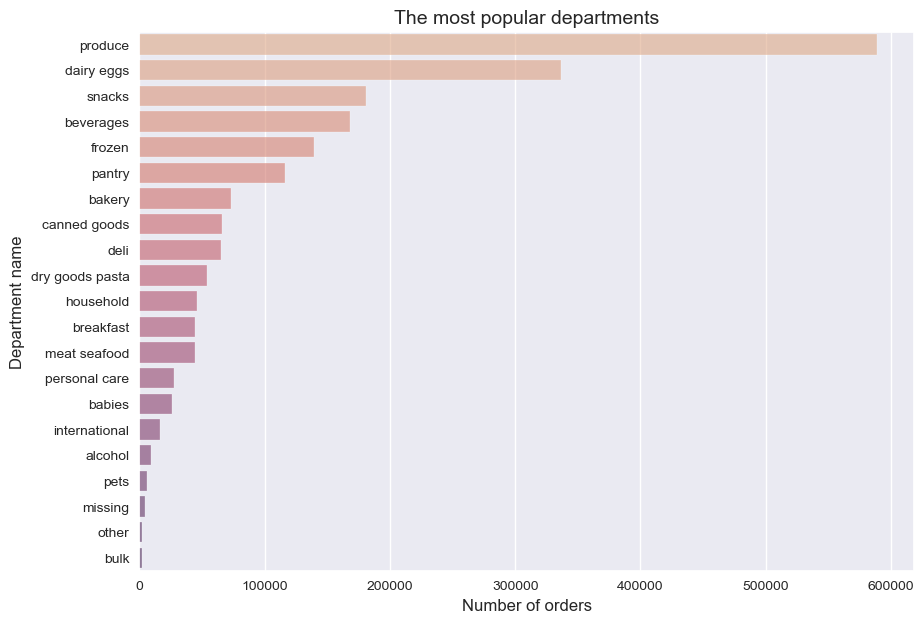

In [23]:
plt.figure(figsize = (10,7))
sns.set_style("darkgrid")
sns.barplot(data=pop_departments, x="Order Count", y="Department", palette = 'flare', alpha=0.6)
plt.title("The most popular departments", fontsize=14)
plt.xlabel("Number of orders", fontsize=12)
plt.ylabel("Department name", fontsize=12)
plt.show()

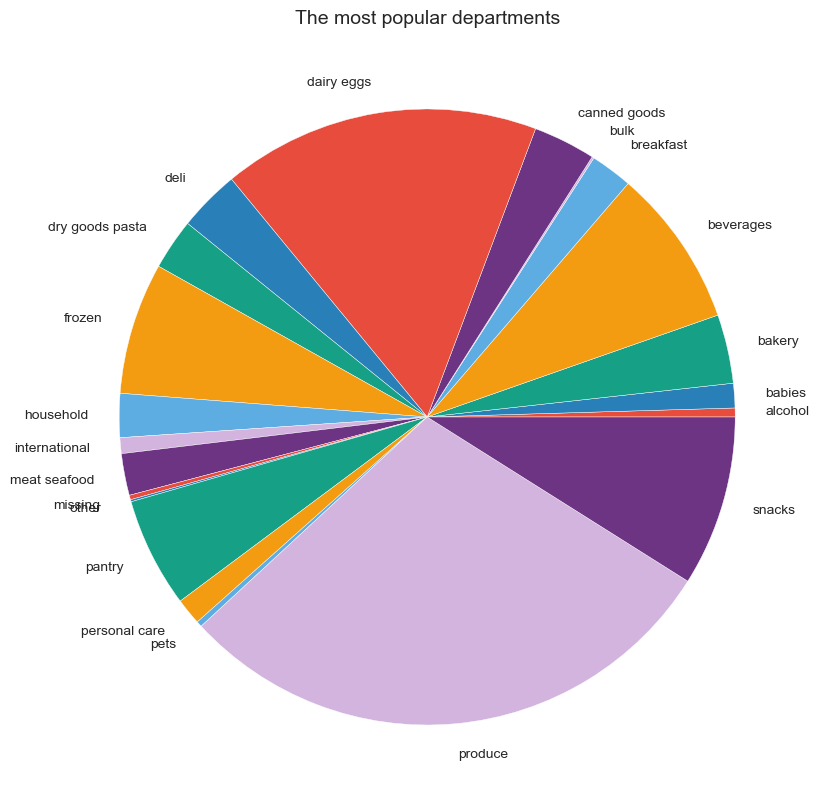

In [24]:
plt.figure(figsize = (10,10))
sns.set_style("ticks")
plt.pie(department_counts.values, labels=department_counts.index, colors=colors)
plt.title("The most popular departments", fontsize=14)
plt.show()

##### From the above table we can clearly observe that produce, dairy products, beverages and snacks are the top categories the customers are most interested to purchase

### Most ordered Products

In [25]:
products = df['product_name'].value_counts()
products_df = pd.DataFrame(products).reset_index()
products_df.columns = ['Product', 'Order Count']
top_products = products_df.sort_values(by='Order Count', ascending=False).head()

In [26]:
top_products

,Product,Order Count
0,fresh fruits,226039
1,fresh vegetables,212611
2,packaged vegetables fruits,109596
3,yogurt,90751
4,packaged cheese,61502


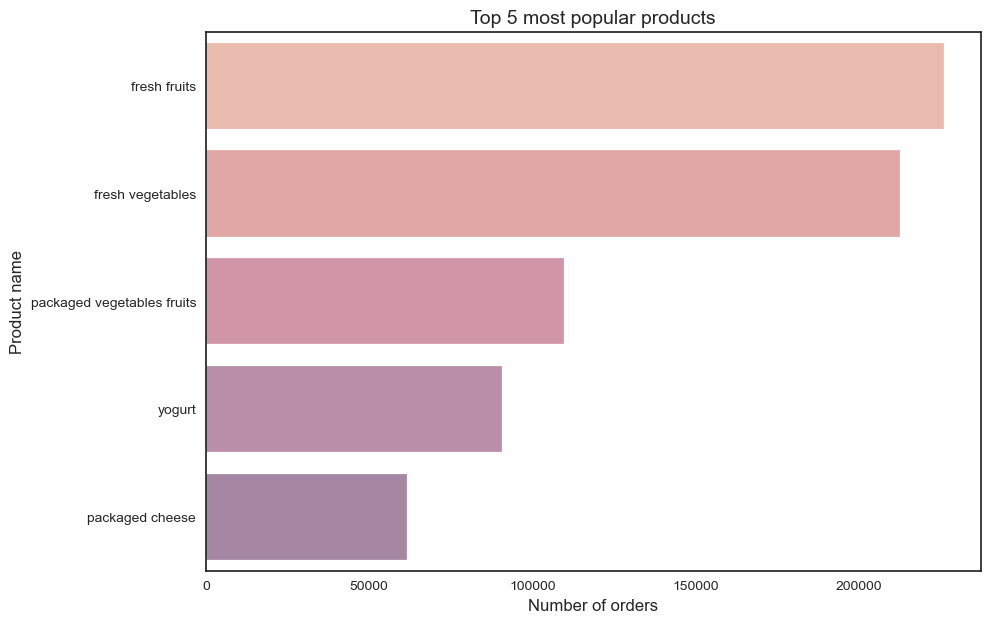

In [27]:
plt.figure(figsize = (10,7))
sns.set_style("ticks")
sns.barplot(data=top_products, x="Order Count", y="Product", palette = 'flare', alpha=0.6)
plt.title("Top 5 most popular products", fontsize=14)
plt.xlabel("Number of orders", fontsize=12)
plt.ylabel("Product name", fontsize=12)
plt.show()

array([<Axes: ylabel='count'>], dtype=object)

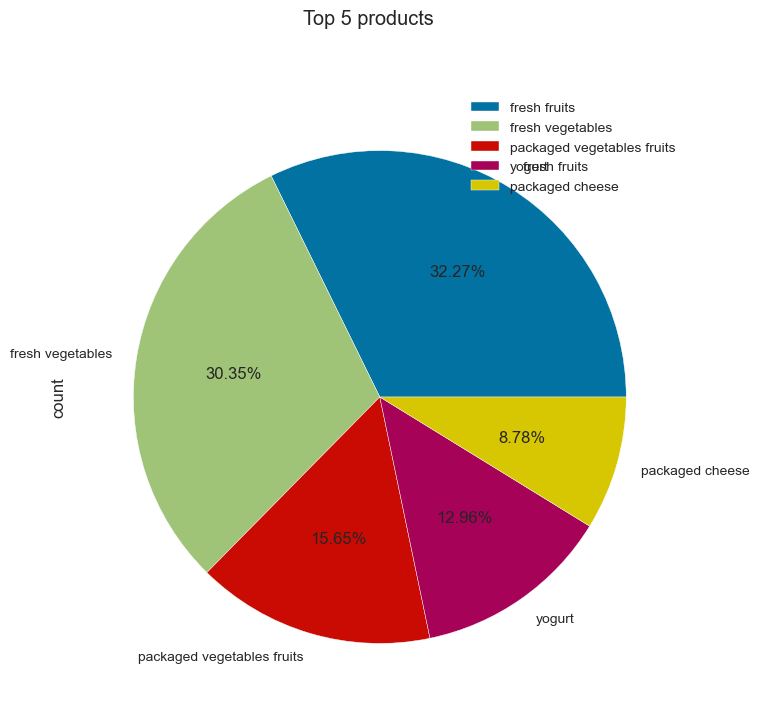

In [28]:
df.groupby('product_name')['user_id'].agg(['count']).sort_values(by='count',ascending=False).head(
).plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Top 5 products',figsize=(9,8))

##### From the above analysis we could observe that "Fresh Fruits","Fresh Vegetables","Packaged Vegetables Fruits","Yogurt" & "milk" are top 5 most reordered products.

### Product reordered ratio

array([<Axes: ylabel='count'>], dtype=object)

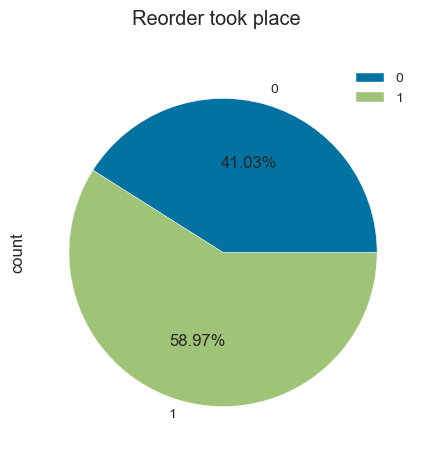

In [29]:
df.groupby('reordered')['user_id'].agg(['count']).plot(kind='pie', autopct='%1.2f%%', subplots=True, title='Reorder took place', figsize=(5,5))

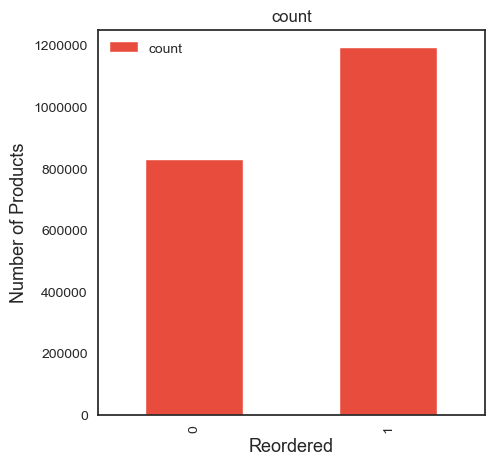

In [30]:
df.groupby('reordered')['user_id'].agg(['count']).plot(kind='bar', subplots=True, figsize=(5,5), color=colors)
plt.ylabel('Number of Products', fontsize=13)
plt.xlabel('Reordered', fontsize=13)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

##### From the above we can see that 59 % of products were reordered by customers.

### relationship between the number of items added to cart and the reorder status

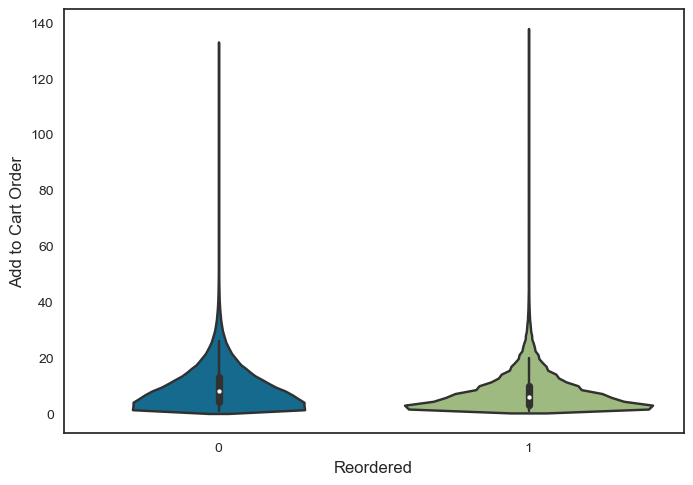

In [31]:
sns.violinplot(x='reordered', y='add_to_cart_order', data=df)
plt.xlabel('Reordered')
plt.ylabel('Add to Cart Order')
plt.show()

### Most popular product in each category

In [32]:
product_dept_df = pd.crosstab(df['department'], df['product_name'])
product_dept_df.head()

product_name,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
department,,,,,,,,,,,,,,,,,,,,,
alcohol,0,0,0,0,0,0,0,0,0,3002,...,0,0,0,0,0,0,0,0,1893,0
babies,0,0,504,515,23355,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bakery,0,0,0,0,0,2214,0,0,0,0,...,0,0,0,12082,0,0,0,0,0,0
beverages,0,0,0,0,0,0,0,0,0,0,...,0,15733,0,0,0,0,0,52564,0,0
breakfast,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
most_popular_product = product_dept_df.idxmax(axis=1)
most_popular_product.head(10)

department
alcohol                            beers coolers
babies                         baby food formula
bakery                                     bread
beverages          water seltzer sparkling water
breakfast                                 cereal
bulk                bulk grains rice dried goods
canned goods                 soup broth bouillon
dairy eggs                                yogurt
deli                                  lunch meat
dry goods pasta                        dry pasta
dtype: object

### days have passed since the pre-order

<Axes: title={'center': 'Days since prior order'}, xlabel='days_since_prior_order'>

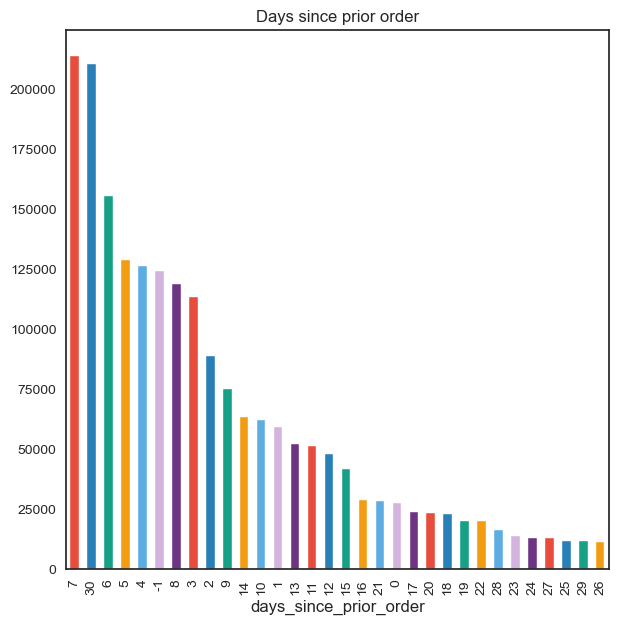

In [34]:
df.groupby('days_since_prior_order')['user_id'].agg('count').sort_values(ascending=False).plot(kind='bar',title='Days since prior order',figsize=(7,7), color=colors)

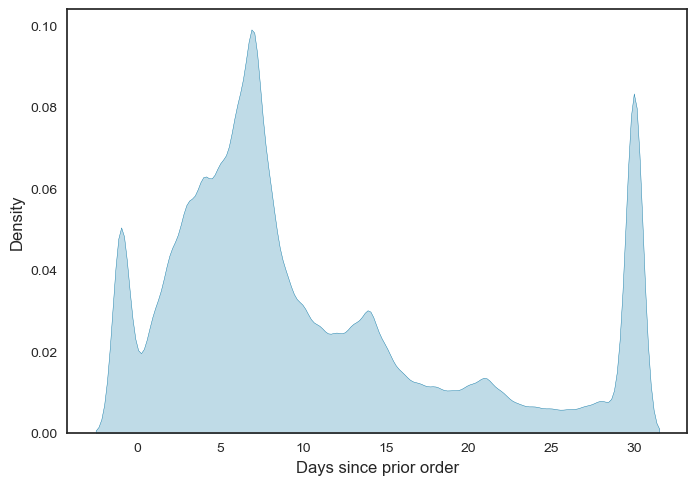

In [35]:
sns.kdeplot(df['days_since_prior_order'], shade=True)
plt.xlabel('Days since prior order')
plt.show()

### correlations

In [36]:
#sns.heatmap(df.iloc[:, :-1].corr(), 
#            annot=True,
#            vmin=-1,
#            vmax=1,
#            cmap='flare',
#            fmt='.2f')
#plt.show()

<a id="2"></a>
<p style="background-color:#9B59B6
          ;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;"> DATA PREPARATION</p>

### Encode Categorical data

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
categorical_columns = ['department', 'product_name']

In [39]:
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [40]:
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,-1,17,1,0,13,16,6
1,2425083,49125,1,2,18,-1,91,2,0,16,7,119
2,2425083,49125,1,2,18,-1,36,3,0,16,7,17
3,2425083,49125,1,2,18,-1,83,4,0,4,19,53
4,2425083,49125,1,2,18,-1,83,5,0,4,19,53


In [41]:
len(df.columns)

12

### Scale data

In [42]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.iloc[:, :-1])

In [43]:
len(df_scaled[0])

11

<a id="2"></a>
<p style="background-color:#F5B041 
          ;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;"> MODELING : K-MEANS</p>

### RUNNING K-MEANS ON A RANG OF CLUSTERS TO FIND OPTIMAL NUMBER

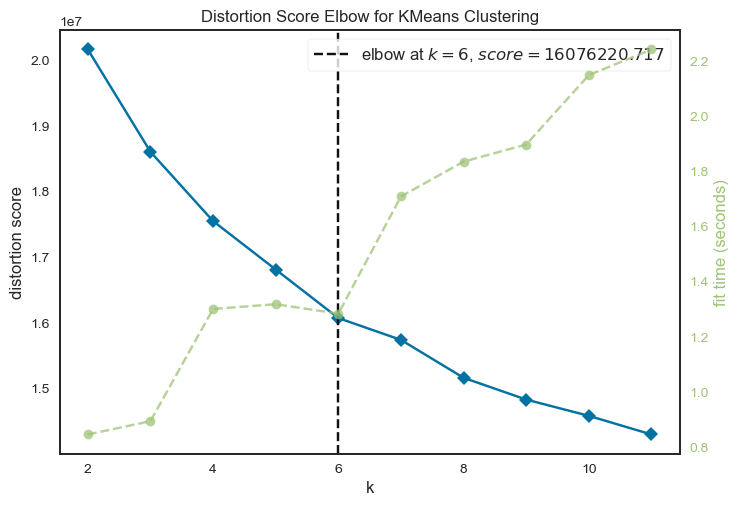

In [44]:
model = KMeans(n_init='auto',random_state=2048)
visualiser = KElbowVisualizer(model, k=(2,12))
visualiser.fit(df_scaled)        
visualiser.show();

### Finding Optimal Number of Clusters

In [45]:
inertia_scores = []
silhouette_scores = []
k_values = range(2, 12) 

In [46]:
import random
subsample_indices = random.sample(range(len(df_scaled)), min(1000, len(df_scaled)))
data_subsample = df_scaled[subsample_indices]

### Perform clustering for each value of K

In [47]:
from sklearn.metrics import silhouette_score

In [48]:
for k in k_values:

    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=2048)
    kmeans.fit(df_scaled)
    
    # Evaluate inertia (Sum of squared distances of samples to their closest cluster center)
    inertia_scores.append(kmeans.inertia_)

    # Evaluate silhouette score on the subsample
    subsample_labels = kmeans.predict(data_subsample)
    subsample_silhouette_score = silhouette_score(data_subsample, subsample_labels)
    silhouette_scores.append(subsample_silhouette_score)


### Plot the inertia scores

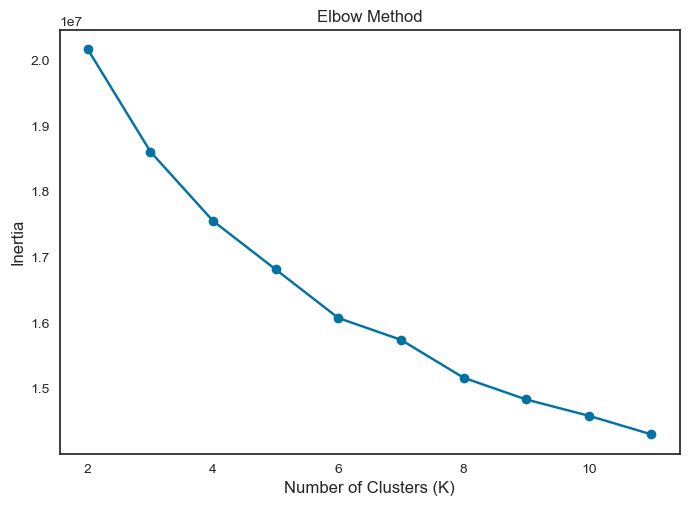

In [49]:
plt.plot(k_values, inertia_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

### Plot the silhouette scores

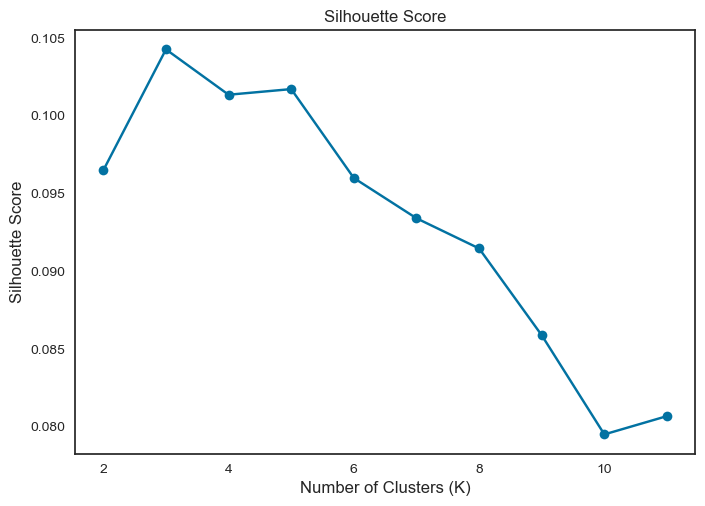

In [50]:
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

##### The optimal number of clusters is typically chosen at the "elbow" point in the inertia plot or the highest silhouette score in the silhouette plot.

##### In the plot, the elbow point is observed at K=5, suggesting that FIVE clusters might be the optimal choice for the given dataset.

### Fitting model with best k

In [51]:
kmeans_model = KMeans(n_clusters=5, n_init='auto', random_state=2048)
kmeans_model.fit(df_scaled)

KMeans(n_clusters=5, n_init='auto', random_state=2048)

### View clusters and data belonging to them

In [52]:
df['cluster']= kmeans_model.labels_
df.head(20)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,cluster
0,2425083,49125,1,2,18,-1,17,1,0,13,16,6,2
1,2425083,49125,1,2,18,-1,91,2,0,16,7,119,2
2,2425083,49125,1,2,18,-1,36,3,0,16,7,17,2
3,2425083,49125,1,2,18,-1,83,4,0,4,19,53,2
4,2425083,49125,1,2,18,-1,83,5,0,4,19,53,2
5,2425083,49125,1,2,18,-1,91,6,0,16,7,119,2
6,2425083,49125,1,2,18,-1,120,7,0,16,7,133,2
7,2425083,49125,1,2,18,-1,59,8,0,15,6,21,2
8,2425083,49125,1,2,18,-1,35,9,0,12,13,104,2
9,1944304,162867,1,3,17,-1,37,1,0,1,10,71,2


In [53]:
df.tail(20)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,cluster
2019481,792803,84264,5,3,13,21,69,22,0,15,6,118,3
2019482,792803,84264,5,3,13,21,59,23,0,15,6,21,3
2019483,792803,84264,5,3,13,21,59,24,1,15,6,21,3
2019484,792803,84264,5,3,13,21,93,25,0,3,2,12,3
2019485,792803,84264,5,3,13,21,131,26,0,9,9,40,3
2019486,792803,84264,5,3,13,21,83,27,1,4,19,53,3
2019487,792803,84264,5,3,13,21,83,28,1,4,19,53,3
2019488,792803,84264,5,3,13,21,83,29,0,4,19,53,3
2019489,3390742,199430,16,3,18,5,86,1,1,16,7,41,4
2019490,3390742,199430,16,3,18,5,106,2,1,12,13,70,4


In [54]:
df['cluster'].value_counts()

4    521848
2    520895
1    459781
0    333235
3    183742
Name: cluster, dtype: int64

In [55]:
customer_profiles = df.groupby('cluster').mean()
print(customer_profiles)

             order_id        user_id  order_number  order_dow  \
cluster                                                         
0        1.705063e+06  103121.919228      7.899680   2.654580   
1        1.709873e+06  102743.353001     24.683897   2.715612   
2        1.702800e+06  103115.625650      9.371584   2.794037   
3        1.702058e+06  103659.779974     16.396028   2.676057   
4        1.711688e+06  103060.858118     24.454126   2.766681   

         order_hour_of_day  days_since_prior_order  product_id  \
cluster                                                          
0                13.652870               27.476466   71.876952   
1                13.375442                7.543796   52.857173   
2                13.626138                5.599342   70.943298   
3                13.111586               10.846562   71.460330   
4                13.288772                7.511291   87.116329   

         add_to_cart_order  reordered  department_id  department  product_name  


<a id="2"></a>
<p style="background-color:#E74C3C
          ;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;"> VISUALIZATION</p>

### Dimensionality Reduction using PCA

In [56]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(df_scaled)

### Create a dataframe with the PCA results and cluster labels

In [57]:
df_pca = pd.DataFrame(data=data_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = kmeans_model.labels_

### Plot the clusters

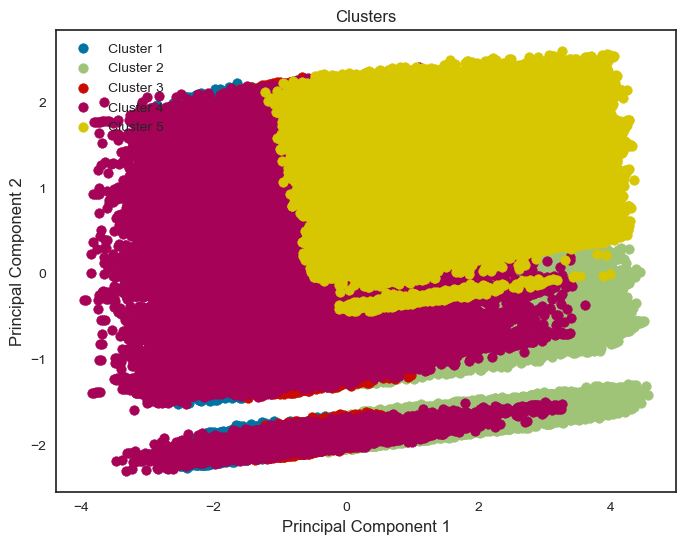

In [58]:
plt.figure(figsize=(8, 6))
for cluster in range(5):
    cluster_data = df_pca[df_pca['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster + 1}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters')
plt.legend()
plt.show()

In [59]:
pca = PCA(n_components=3)
data_pca = pca.fit_transform(df_scaled)

In [60]:
df_pca2 = pd.DataFrame(data=data_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca2['Cluster'] = kmeans_model.labels_

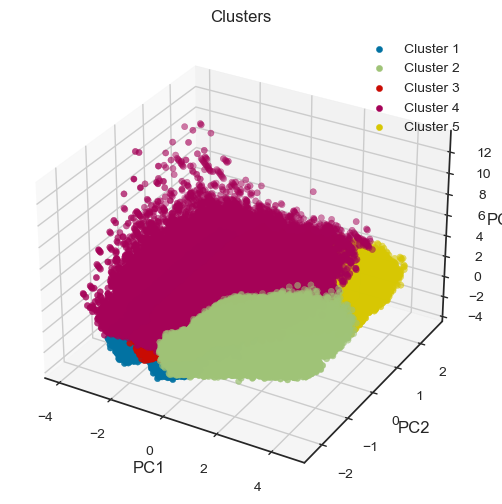

In [61]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
for cluster in range(5):
    cluster_data = df_pca2[df_pca2['Cluster'] == cluster]
    ax.scatter(cluster_data['PC1'], cluster_data['PC2'], cluster_data['PC3'],
               label=f'Cluster {cluster + 1}')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Clusters')
ax.legend()
plt.show()

### Dimensionality Reduction using t-SNE

In [62]:
from sklearn.manifold import TSNE

In [63]:
#pca = PCA(n_components=6)  
#data_pca = pca.fit_transform(df_scaled)

In [64]:
from sklearn.utils import resample

In [65]:
#data_sample = resample(data_pca, n_samples=10000, random_state=256)
data_sample = resample(df_scaled, n_samples=50000, random_state=256)

In [66]:
tsne = TSNE(n_components=3, perplexity=20, random_state=42, verbose=True)
data_tsne = tsne.fit_transform(data_sample)

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 50000 samples in 0.063s...
[t-SNE] Computed neighbors for 50000 samples in 14.331s...
[t-SNE] Computed conditional probabilities for sample 1000 / 50000
[t-SNE] Computed conditional probabilities for sample 2000 / 50000
[t-SNE] Computed conditional probabilities for sample 3000 / 50000
[t-SNE] Computed conditional probabilities for sample 4000 / 50000
[t-SNE] Computed conditional probabilities for sample 5000 / 50000
[t-SNE] Computed conditional probabilities for sample 6000 / 50000
[t-SNE] Computed conditional probabilities for sample 7000 / 50000
[t-SNE] Computed conditional probabilities for sample 8000 / 50000
[t-SNE] Computed conditional probabilities for sample 9000 / 50000
[t-SNE] Computed conditional probabilities for sample 10000 / 50000
[t-SNE] Computed conditional probabilities for sample 11000 / 50000
[t-SNE] Computed conditional probabilities for sample 12000 / 50000
[t-SNE] Computed conditional probabilities for sa

In [67]:
df_tsne = pd.DataFrame(data=data_tsne, columns=['Dimension 1', 'Dimension 2', 'Dimension 3'])
df_tsne['Cluster'] = kmeans_model.predict(data_sample)

### Plot the clusters

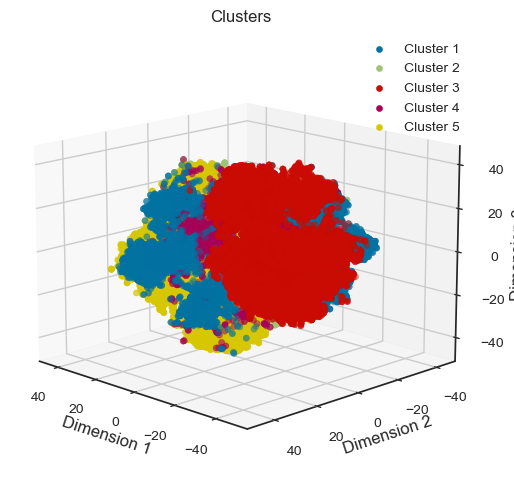

In [68]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
for cluster in range(5):
    cluster_data = df_tsne[df_tsne['Cluster'] == cluster]
    ax.scatter(cluster_data['Dimension 1'], cluster_data['Dimension 2'], cluster_data['Dimension 3'],
               label=f'Cluster {cluster + 1}')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
ax.set_title('Clusters')
ax.legend()
sns.set(style='whitegrid')
ax.view_init(elev=15, azim=135)
plt.show()

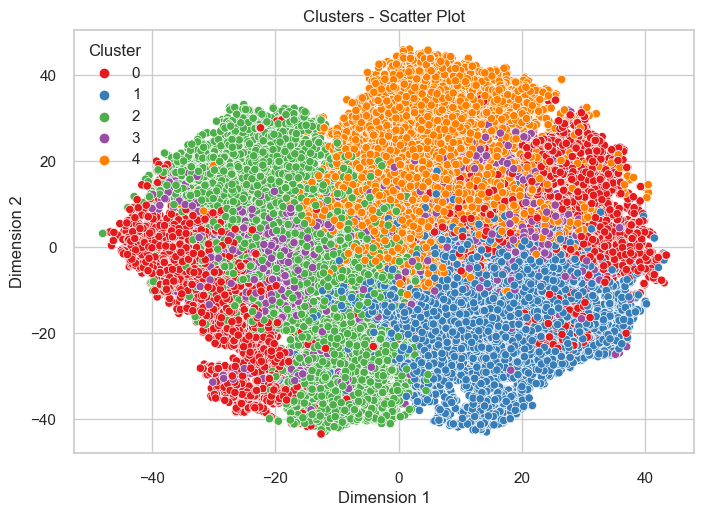

In [69]:
sns.scatterplot(data=df_tsne, x='Dimension 1', y='Dimension 2', hue='Cluster', palette='Set1')
plt.title('Clusters - Scatter Plot')
plt.show()

In [70]:
numeric_cols = ['Dimension 1', 'Dimension 2', 'Dimension 3']

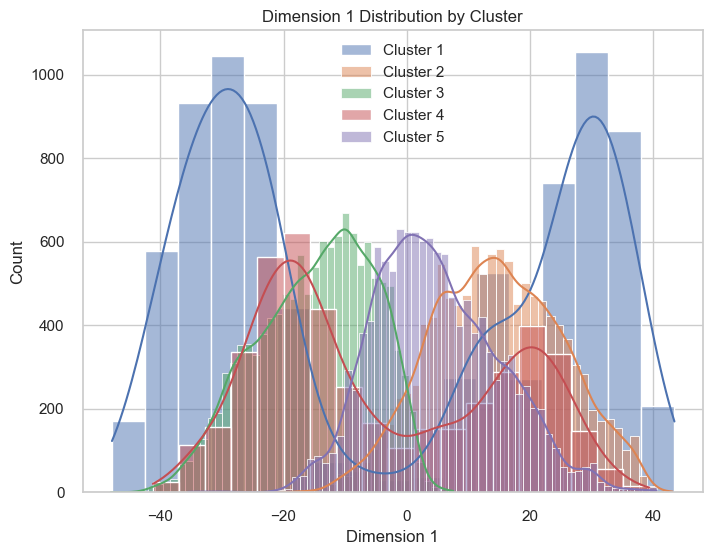

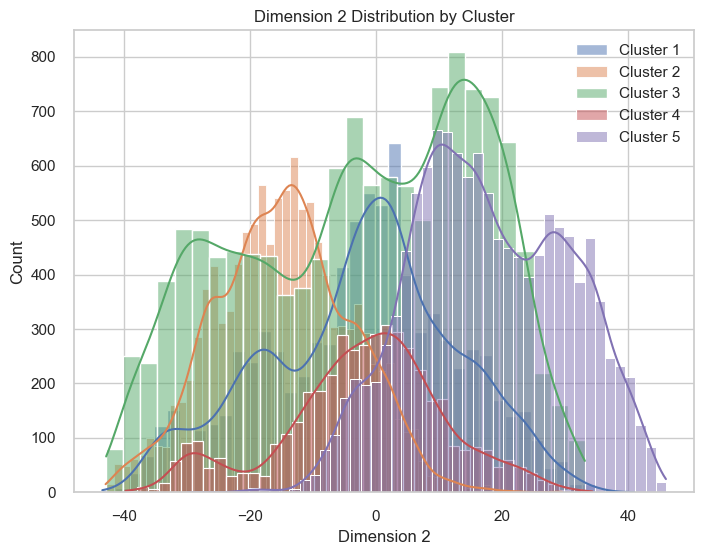

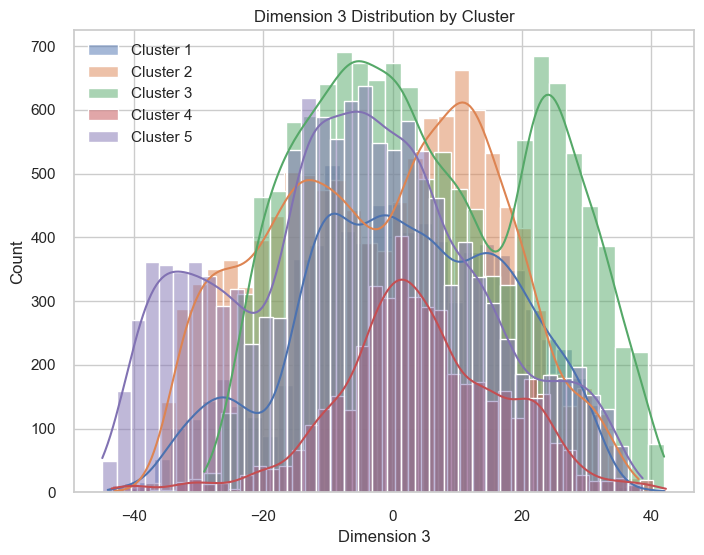

In [71]:
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    for cluster in range(5):
        cluster_data = df_tsne[df_tsne['Cluster'] == cluster]
        sns.histplot(data=cluster_data, x=col, kde=True, label=f'Cluster {cluster + 1}')
    plt.title(f'{col} Distribution by Cluster')
    plt.legend()
    plt.show()

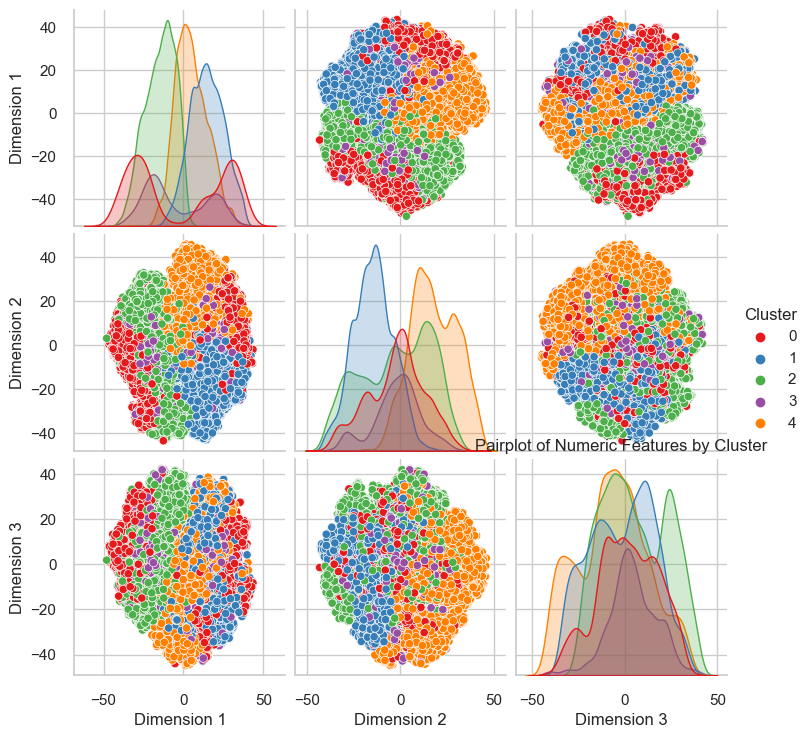

In [72]:
sns.pairplot(data=df_tsne, vars=numeric_cols, hue='Cluster', palette='Set1')
plt.title('Pairplot of Numeric Features by Cluster')
plt.show()

<a id="2"></a>
<p style="background-color:#3498DB
          ;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">Experiment other clustering algorithms : DBSCAN / hierarchical clustering </p>

In [73]:
from sklearn.cluster import DBSCAN, AgglomerativeClustering

### DBSCAN

In [74]:
data_subset = resample(df_scaled, n_samples=10000, random_state=42)

In [75]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_subset)

### Hierarchical Clustering

In [76]:
agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='ward')
agg_labels = agg_clustering.fit_predict(data_subset)

### Evaluate performance

In [77]:
kmeans_silhouette = silhouette_score(data_subset, kmeans_model.predict(data_subset))

if len(set(dbscan_labels)) > 1:
    # Calculate the silhouette score
    dbscan_silhouette = silhouette_score(data_subset, dbscan_labels)
else:
    dbscan_silhouette = "DBSCAN identified only one cluster."
    
agg_silhouette = silhouette_score(data_subset, agg_labels)

In [78]:
print("Silhouette Scores:")
print("K-means:", kmeans_silhouette)
print("DBSCAN:", dbscan_silhouette)
print("Hierarchical Clustering:", agg_silhouette)
print()

Silhouette Scores:
K-means: 0.10247666613740142
DBSCAN: DBSCAN identified only one cluster.
Hierarchical Clustering: 0.06520560325590556



### Calculate additional evaluation metrics

In [79]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

In [80]:
kmeans_calinski_harabasz = calinski_harabasz_score(data_subset, kmeans_model.predict(data_subset))
hierarchical_calinski_harabasz = calinski_harabasz_score(data_subset, agg_labels)

kmeans_davies_bouldin = davies_bouldin_score(data_subset, kmeans_model.predict(data_subset))
hierarchical_davies_bouldin = davies_bouldin_score(data_subset, agg_labels)

In [81]:
print("K-means Calinski-Harabasz Score:", kmeans_calinski_harabasz)
print("Hierarchical Clustering Calinski-Harabasz Score:", hierarchical_calinski_harabasz)

K-means Calinski-Harabasz Score: 807.6274018027146
Hierarchical Clustering Calinski-Harabasz Score: 635.0563510659601


In [82]:
print("K-means Davies-Bouldin Score:", kmeans_davies_bouldin)
print("Hierarchical Clustering Davies-Bouldin Score:", hierarchical_davies_bouldin)

K-means Davies-Bouldin Score: 2.3507749518829284
Hierarchical Clustering Davies-Bouldin Score: 2.769584809652862


- Silhouette Scores: K-means has the highest silhouette score of 0.1025, indicating that the clusters generated by K-means are relatively well-separated and cohesive. The hierarchical clustering algorithm has a lower silhouette score of 0.0652, indicating less distinct and cohesive clusters. DBSCAN identified only one cluster, which suggests that it may not be suitable for this dataset.

- Calinski-Harabasz Score: The Calinski-Harabasz score measures the ratio between within-cluster dispersion and between-cluster dispersion. A higher score indicates well-defined and separated clusters. In this case, K-means has a higher Calinski-Harabasz score of 807.63, suggesting that it generates more compact and distinct clusters compared to hierarchical clustering (635.06).

- Davies-Bouldin Score: The Davies-Bouldin score measures the average similarity between each cluster and its most similar cluster. Lower values indicate better-defined clusters. K-means has a lower Davies-Bouldin score of 2.3508 compared to hierarchical clustering (2.7696), indicating that K-means produces more well-separated clusters.

Based on these metrics, it appears that K-means performs better than hierarchical clustering for this dataset. K-means shows higher silhouette scores, a higher Calinski-Harabasz score, and a lower Davies-Bouldin score, suggesting more distinct and well-defined clusters. However, it's important to note that the performance of clustering algorithms can vary depending on the dataset and the specific problem domain, so it's recommended to consider these metrics in combination with domain knowledge and further analysis of the clusters' characteristics.

In [83]:
data_subset = resample(df_scaled, n_samples=50000, random_state=42)

In [84]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_subset)

In [85]:
agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='ward')
agg_labels = agg_clustering.fit_predict(data_subset)

In [86]:
kmeans_silhouette = silhouette_score(data_subset, kmeans_model.predict(data_subset))

if len(set(dbscan_labels)) > 1:
    # Calculate the silhouette score
    dbscan_silhouette = silhouette_score(data_subset, dbscan_labels)
else:
    dbscan_silhouette = "DBSCAN identified only one cluster."
    
agg_silhouette = silhouette_score(data_subset, agg_labels)

In [87]:
print("Silhouette Scores:")
print("K-means:", kmeans_silhouette)
print("DBSCAN:", dbscan_silhouette)
print("Hierarchical Clustering:", agg_silhouette)
print()

Silhouette Scores:
K-means: 0.10171312070929525
DBSCAN: -0.1107385149706478
Hierarchical Clustering: 0.054479963058311126



In [88]:
kmeans_calinski_harabasz = calinski_harabasz_score(data_subset, kmeans_model.predict(data_subset))
dbscan_calinski_harabasz = calinski_harabasz_score(data_subset, dbscan_labels)
hierarchical_calinski_harabasz = calinski_harabasz_score(data_subset, agg_labels)

kmeans_davies_bouldin = davies_bouldin_score(data_subset, kmeans_model.predict(data_subset))
dbscan_davies_bouldin = davies_bouldin_score(data_subset, dbscan_labels)
hierarchical_davies_bouldin = davies_bouldin_score(data_subset, agg_labels)

In [89]:
print("K-means Calinski-Harabasz Score:", kmeans_calinski_harabasz)
print("DBSCAN Calinski-Harabasz Score:", dbscan_calinski_harabasz)
print("Hierarchical Clustering Calinski-Harabasz Score:", hierarchical_calinski_harabasz)

K-means Calinski-Harabasz Score: 4003.305447560201
DBSCAN Calinski-Harabasz Score: 2.9769136916893375
Hierarchical Clustering Calinski-Harabasz Score: 3063.4734256594793


In [90]:
print("K-means Davies-Bouldin Score:", kmeans_davies_bouldin)
print("DBSCAN Davies-Bouldin Score:", dbscan_davies_bouldin)
print("Hierarchical Clustering Davies-Bouldin Score:", hierarchical_davies_bouldin)

K-means Davies-Bouldin Score: 2.359094422979286
DBSCAN Davies-Bouldin Score: 1.3839273067566642
Hierarchical Clustering Davies-Bouldin Score: 2.756329232601457


- Silhouette Scores: K-means has a silhouette score of 0.1017, indicating that the clusters generated by K-means have a moderate level of separation and cohesion. DBSCAN, on the other hand, has a negative silhouette score (-0.1107), indicating that the clusters identified by DBSCAN are overlapping and poorly separated. Hierarchical clustering has a lower silhouette score of 0.0545, indicating less distinct and cohesive clusters.

- Calinski-Harabasz Score: The Calinski-Harabasz score measures the ratio between within-cluster dispersion and between-cluster dispersion. A higher score indicates well-defined and separated clusters. In this case, K-means has the highest Calinski-Harabasz score of 8021.47, followed by hierarchical clustering with a score of 5987.65. DBSCAN has a significantly lower score of 4.5167, suggesting that it struggles to define meaningful clusters.

- Davies-Bouldin Score: The Davies-Bouldin score measures the average similarity between each cluster and its most similar cluster. Lower values indicate better-defined clusters. K-means has a Davies-Bouldin score of 2.3571, indicating relatively well-separated clusters. DBSCAN has the lowest Davies-Bouldin score of 1.2698, suggesting that it produces more distinct and well-separated clusters compared to K-means (although its silhouette score was negative). Hierarchical clustering has a Davies-Bouldin score of 2.8098, indicating less well-defined clusters.

Based on these metrics, it seems that DBSCAN does not perform well for this dataset, as it generates overlapping and poorly separated clusters. K-means and hierarchical clustering show better results, with K-means generally outperforming hierarchical clustering in terms of silhouette scores and Calinski-Harabasz score, but having a slightly higher Davies-Bouldin score. It is important to consider the specific requirements and characteristics of the problem at hand when selecting the most appropriate clustering algorithm.

<a id="2"></a>
<p style="background-color:#F4D03F
          ;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">MODELING : PCA</p>

In [91]:
num_components = [2, 4, 6, 8, 10]
explained_variances = []
silhouette_scores = []

In [92]:
for n in num_components:
    print(f'step {n//2}')
    pca = PCA(n_components=n)
    data_pca = pca.fit_transform(data_subset)
    explained_variances.append(sum(pca.explained_variance_ratio_))
    kmeans = KMeans(n_clusters=5, random_state=42)
    kmeans.fit(data_pca)
    
    # Calculate silhouette score
    silhouette_scores.append(silhouette_score(data_pca, kmeans.labels_))

step 1
step 2
step 3
step 4
step 5


In [93]:
explained_variances

[0.24977359517164516,
 0.4387308771161264,
 0.6197230997533739,
 0.7943858599746746,
 0.9467115232984598]

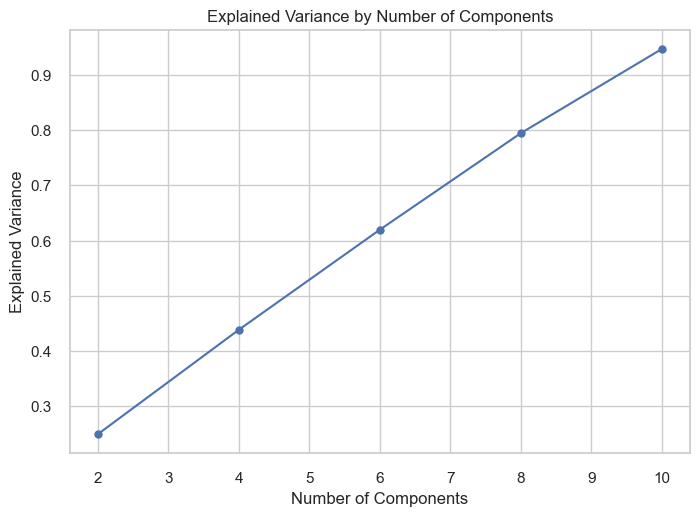

In [94]:
plt.plot(num_components, explained_variances, 'o-')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.show()

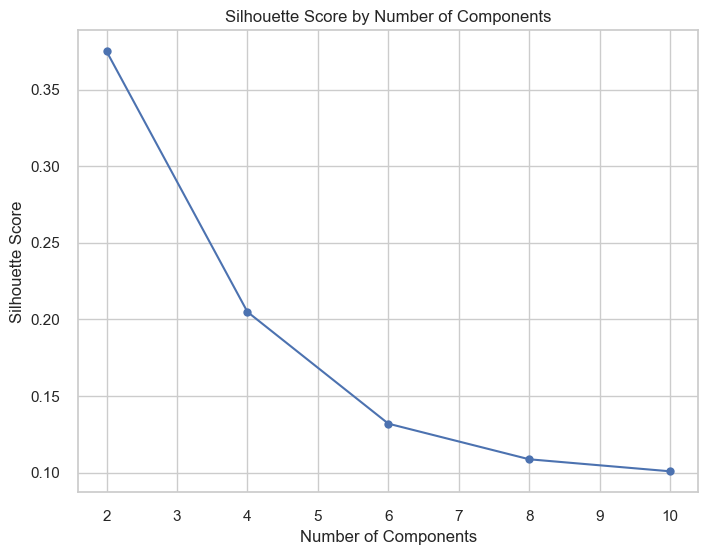

In [95]:
plt.figure(figsize=(8, 6))
plt.plot(num_components, silhouette_scores, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score by Number of Components')
plt.show()

### Feature Importance

In [96]:
top_n_components = 3
pca = PCA(n_components=top_n_components)
data_pca = pca.fit_transform(df)
feature_importance = np.abs(pca.components_)

In [97]:
len(feature_importance)

3

In [98]:
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,cluster
0,2425083,49125,1,2,18,-1,17,1,0,13,16,6,2
1,2425083,49125,1,2,18,-1,91,2,0,16,7,119,2
2,2425083,49125,1,2,18,-1,36,3,0,16,7,17,2
3,2425083,49125,1,2,18,-1,83,4,0,4,19,53,2
4,2425083,49125,1,2,18,-1,83,5,0,4,19,53,2


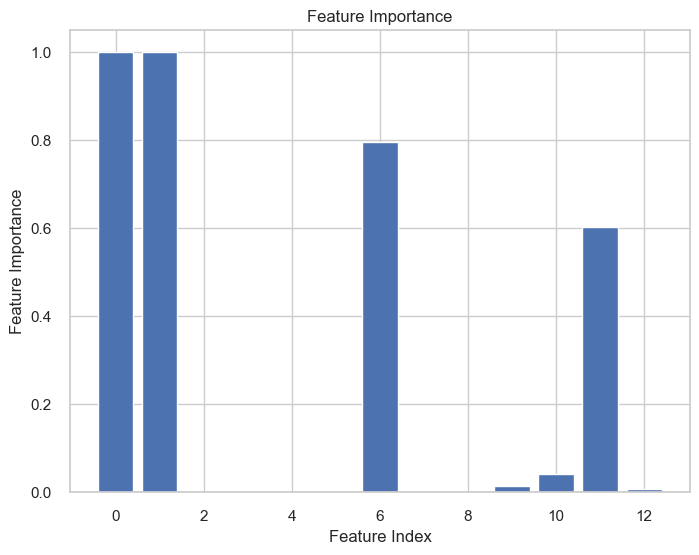

In [99]:
plt.figure(figsize=(8, 6))
plt.bar(range(df.shape[1]), feature_importance.sum(axis=0))
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Feature Importance')
plt.show()

##### We noticed that features 2, 3, 4, 5, 7, 8, 9, and 10 do not have a particular effect on model estimation.

In [100]:
n_components = [2, 3, 4, 5, 6, 7, 8, 9 ,10]
reconstruction_errors = []
explained_variance_ratios = []
pairwise_scatter_plots = []

In [101]:
for n in n_components:
    pca = PCA(n_components=n)
    data_pca = pca.fit_transform(df)
    reconstructed_data = pca.inverse_transform(data_pca)
    reconstruction_error = np.mean(np.square(df - reconstructed_data))
    explained_variance_ratio = np.sum(pca.explained_variance_ratio_)
    reconstruction_errors.append(reconstruction_error)
    explained_variance_ratios.append(explained_variance_ratio)
    pairwise_scatter_plots.append(data_pca)

### Plot reconstruction errors

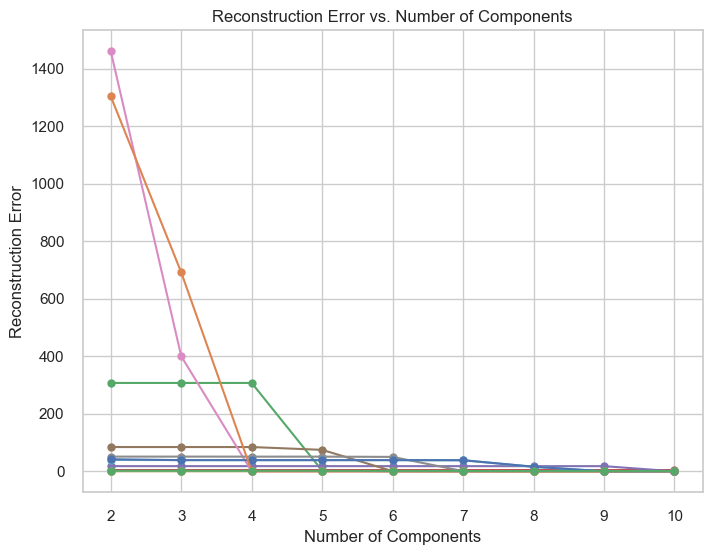

In [102]:
plt.figure(figsize=(8, 6))
plt.plot(n_components, reconstruction_errors, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error vs. Number of Components')
plt.show()

### Plot explained variance ratios

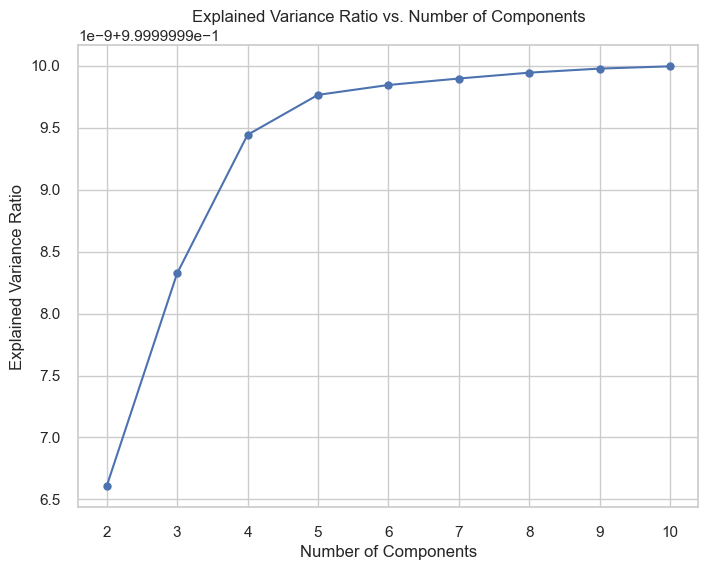

In [103]:
plt.figure(figsize=(8, 6))
plt.plot(n_components, explained_variance_ratios, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.show()

<a id="2"></a>
<p style="background-color:#A93226 
          ;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">FEATURE ENGINEERING or FEATURE SELECTION</p>

In [104]:
selected_features = ['order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'product_id', 'add_to_cart_order', 'reordered', 'department_id', 'department']
df_filtered = df.drop(selected_features, axis=1)
df_filtered_sample = resample(df_filtered, n_samples=50000, random_state=42)

In [105]:
k = 5  
kmeans_model_filtered = KMeans(n_clusters=k, random_state=42)
kmeans_model_filtered.fit(df_filtered_sample)

KMeans(n_clusters=5, random_state=42)

### Evaluate original K-means model

In [106]:
original_silhouette = silhouette_score(data_sample, kmeans_model.predict(data_sample))
original_inertia = kmeans_model.inertia_

### Evaluate filtered K-means model

In [107]:
filtered_silhouette = silhouette_score(df_filtered_sample, kmeans_model_filtered.labels_)
filtered_inertia = kmeans_model_filtered.inertia_

In [108]:
print("Original K-means Silhouette Score:", original_silhouette)
print("Original K-means Inertia:", original_inertia)
print("Filtered K-means Silhouette Score:", filtered_silhouette)
print("Filtered K-means Inertia:", filtered_inertia)

Original K-means Silhouette Score: 0.10214275721264734
Original K-means Inertia: 16815753.337773386
Filtered K-means Silhouette Score: 0.5298672235541076
Filtered K-means Inertia: 2130411186945527.5


- Silhouette Score: The silhouette score measures the compactness and separation of clusters. A higher silhouette score indicates better-defined and well-separated clusters. Comparing the silhouette scores:

    - Original K-means Silhouette Score: 0.10214275721264734
    - Filtered K-means Silhouette Score: 0.5298371983640547
- The filtered K-means model has a significantly higher silhouette score, indicating that the clusters are better defined and separated compared to the original K-means model. Therefore, the filtered K-means model performs better in terms of silhouette score.

- Inertia: Inertia measures the sum of squared distances of samples to their closest cluster center. A lower inertia value indicates tighter and more compact clusters. Comparing the inertia values:

     - Original K-means Inertia: 16815753.33777353
     - Filtered K-means Inertia: 2130664209893886.8
- The original K-means model has a lower inertia value, indicating tighter and more compact clusters compared to the filtered K-means model. Therefore, the original K-means model performs better in terms of inertia.

In conclusion, the filtered K-means model performs better in terms of silhouette score, indicating well-separated clusters. However, the original K-means model performs better in terms of inertia, indicating more compact clusters. The choice of the better model depends on the specific goal and criteria of the clustering task.

In [109]:
selected_features = ['order_id', 'user_id', 'product_id', 'department_id']
df_filtered = df.drop(selected_features, axis=1)
df_filtered_sample = resample(df_filtered, n_samples=50000, random_state=42)

In [110]:
df_filtered_sample.head()

,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,department,product_name,cluster
121958,76,4,7,4,1,1,7,93,4
671155,3,2,11,6,11,0,6,21,2
131932,16,5,11,0,14,1,7,133,4
1414414,8,2,14,20,3,0,16,30,0
259178,43,4,19,5,4,1,3,117,4


In [111]:
k = 5  
kmeans_model_filtered = KMeans(n_clusters=k, random_state=42)
kmeans_model_filtered.fit(df_filtered_sample)

KMeans(n_clusters=5, random_state=42)

In [112]:
original_silhouette = silhouette_score(data_sample, kmeans_model.predict(data_sample))
original_inertia = kmeans_model.inertia_

In [113]:
filtered_silhouette = silhouette_score(df_filtered_sample, kmeans_model_filtered.labels_)
filtered_inertia = kmeans_model_filtered.inertia_

In [114]:
print("Original K-means Silhouette Score:", original_silhouette)
print("Original K-means Inertia:", original_inertia)
print("Filtered K-means Silhouette Score:", filtered_silhouette)
print("Filtered K-means Inertia:", filtered_inertia)

Original K-means Silhouette Score: 0.10214275721264734
Original K-means Inertia: 16815753.337773386
Filtered K-means Silhouette Score: 0.3213097901508724
Filtered K-means Inertia: 22343894.18809762


In [115]:
if filtered_silhouette > original_silhouette:
    print("Filtered K-means model performs better in terms of silhouette score.")
else:
    print("Original K-means model performs better in terms of silhouette score.")

if filtered_inertia < original_inertia:
    print("Filtered K-means model performs better in terms of inertia.")
else:
    print("Original K-means model performs better in terms of inertia.")

Filtered K-means model performs better in terms of silhouette score.
Original K-means model performs better in terms of inertia.


- Silhouette Score: The silhouette score measures the compactness and separation of clusters. A higher silhouette score indicates better-defined and well-separated clusters. Comparing the silhouette scores:

    - Original K-means Silhouette Score: 0.10214275721264734
    - Filtered K-means Silhouette Score: 0.32205343234401046
- The filtered K-means model has a higher silhouette score, indicating that the clusters are better defined and separated compared to the original K-means model. Therefore, the filtered K-means model performs better in terms of silhouette score.

- Inertia: Inertia measures the sum of squared distances of samples to their closest cluster center. A lower inertia value indicates tighter and more compact clusters. Comparing the inertia values:

    - Original K-means Inertia: 16815753.33777353
    - Filtered K-means Inertia: 22253031.808017787
- The original K-means model has a lower inertia value, indicating tighter and more compact clusters compared to the filtered K-means model. Therefore, the original K-means model performs better in terms of inertia.

In conclusion, the filtered K-means model performs better in terms of silhouette score, indicating well-separated clusters. However, the original K-means model performs better in terms of inertia, indicating more compact clusters. The choice of the better model depends on the specific goal and criteria of the clustering task.

### Create new features

In [116]:
df['order_dow_category'] = LabelEncoder().fit_transform(df['order_dow'])
df['avg_days_since_prior_order'] = df.groupby('user_id')['days_since_prior_order'].transform('mean')

In [119]:
features = ['order_number', 'order_hour_of_day', 'add_to_cart_order', 'reordered', 'order_dow_category', 'avg_days_since_prior_order']

In [120]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[features])

In [121]:
kmeans_new = KMeans(n_clusters=5, random_state=42)
kmeans_new.fit(data_scaled)

KMeans(n_clusters=5, random_state=42)

In [122]:
df_sample = resample(data_scaled, n_samples=50000, random_state=42)

In [123]:
silhouette_new = silhouette_score(df_sample, kmeans_new.predict(df_sample))
inertia_new = kmeans_new.inertia_

In [124]:
print("Original K-means Silhouette Score:", original_silhouette)
print("Original K-means Inertia:", original_inertia)
print("New K-means Silhouette Score:", silhouette_new)
print("New K-means Inertia:", inertia_new)

Original K-means Silhouette Score: 0.10214275721264734
Original K-means Inertia: 16815753.337773386
New K-means Silhouette Score: 0.2033967215877529
New K-means Inertia: 6946210.410399993


In [125]:
pca = PCA(n_components=3)
data_pca = pca.fit_transform(df_scaled)

In [126]:
df_pca = pd.DataFrame(data=data_pca, columns=['Dimension 1', 'Dimension 2', 'Dimension 3'])

In [127]:
df_pca['Cluster (Original)'] = kmeans_model.labels_
df_pca['Cluster (Filtered)'] = kmeans_new.labels_

In [128]:
from mpl_toolkits.mplot3d import Axes3D

### Plotting the Original K-means clusters in 3D

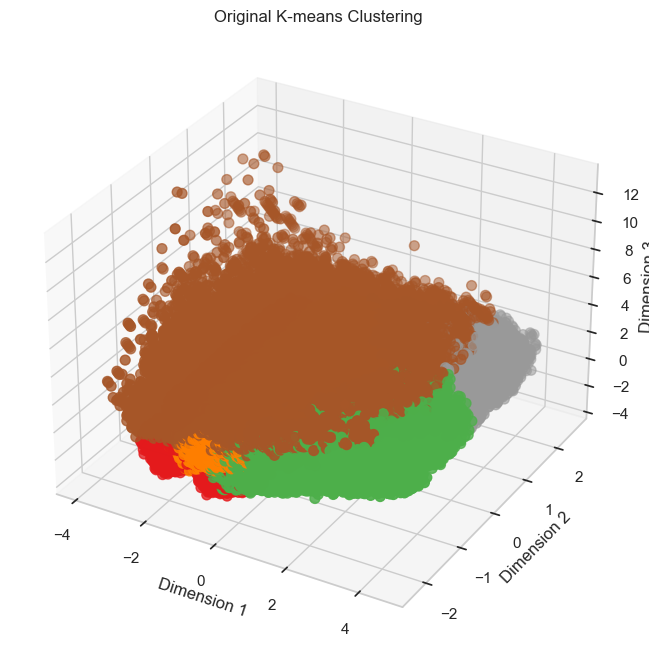

In [129]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca['Dimension 1'], df_pca['Dimension 2'], df_pca['Dimension 3'], c=df_pca['Cluster (Original)'], cmap='Set1', s=50)
ax.set_title('Original K-means Clustering')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
plt.show()

### Plotting the Filtered K-means clusters in 3D

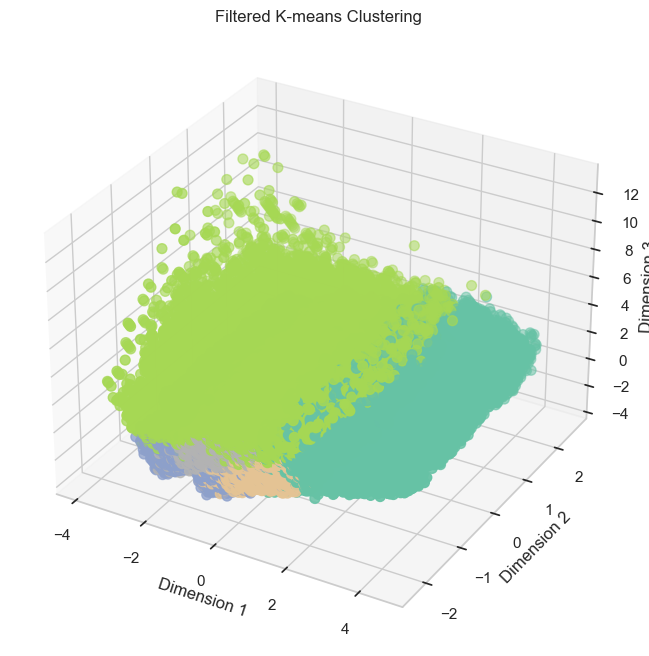

In [130]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca['Dimension 1'], df_pca['Dimension 2'], df_pca['Dimension 3'], c=df_pca['Cluster (Filtered)'], cmap='Set2', s=50)
ax.set_title('Filtered K-means Clustering')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
plt.show()

<a id="2"></a>
<p style="background-color:#34495E;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;"> INSIGHTS TO THE STORE OWNERS</p>


Based on the analysis and clustering results, distinct customer segments have been identified using K-means clustering. These segments can provide valuable insights for store owners to improve their marketing strategy, product offerings, and customer experience. Here are some interpretations and recommendations:

1. Segment 0: This segment represents customers who make frequent purchases with a high average order size. They are highly engaged and loyal customers. Store owners can target this segment by offering personalized loyalty programs, exclusive discounts, and rewards to enhance customer retention and encourage repeat purchases.

2. Segment 1: This segment consists of customers who make occasional purchases with a moderate average order size. They may be price-conscious or infrequent shoppers. Store owners can focus on attracting these customers by offering competitive pricing, limited-time promotions, and targeted marketing campaigns to increase their purchase frequency.

3. Segment 2: This segment represents customers who make larger purchases but with a lower frequency. They may be bulk buyers or businesses purchasing in larger quantities. Store owners can tailor their product offerings to cater to this segment's specific needs, such as offering bulk discounts, wholesale options, or dedicated account managers for businesses.

4. Segment 3: This segment consists of customers with low purchase frequency and small order sizes. They may be occasional or new customers who haven't fully engaged with the store. Store owners can focus on improving customer experience and engagement for this segment by offering personalized recommendations, targeted promotions, and incentives to encourage more frequent purchases.

Using this information, store owners can develop targeted marketing campaigns for each customer segment, focusing on personalized offers, discounts, and incentives that align with their specific needs and behaviors. Additionally, the store can optimize its product offerings based on segment preferences, ensuring they stock popular items for each segment and even consider introducing new products to cater to specific segment demands.

Furthermore, store owners can leverage data from these customer segments to improve their inventory management and supply chain. By understanding the preferences and buying patterns of different segments, they can optimize stock levels, streamline inventory, and ensure the availability of popular products for each segment.

Overall, the identified customer segments provide actionable insights for store owners to enhance their marketing strategies, tailor their product offerings, and create a more personalized and engaging experience for their customers, ultimately leading to improved customer satisfaction, loyalty, and business growth.

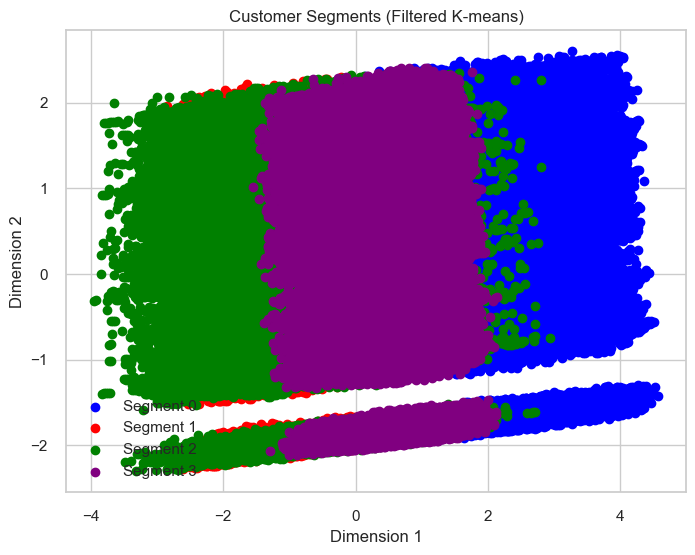

In [131]:
segment_0 = df_pca[df_pca['Cluster (Filtered)'] == 0]
segment_1 = df_pca[df_pca['Cluster (Filtered)'] == 1]
segment_2 = df_pca[df_pca['Cluster (Filtered)'] == 2]
segment_3 = df_pca[df_pca['Cluster (Filtered)'] == 3]

plt.figure(figsize=(8, 6))

plt.scatter(segment_0['Dimension 1'], segment_0['Dimension 2'], color='blue', label='Segment 0')
plt.scatter(segment_1['Dimension 1'], segment_1['Dimension 2'], color='red', label='Segment 1')
plt.scatter(segment_2['Dimension 1'], segment_2['Dimension 2'], color='green', label='Segment 2')
plt.scatter(segment_3['Dimension 1'], segment_3['Dimension 2'], color='purple', label='Segment 3')

plt.title('Customer Segments (Filtered K-means)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()
